In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel('Ретроспективно с ценами.xlsx')

In [ ]:
data

,LRA,RRA,LO,DL,Smg,Sex,Ht,Wt,BMI,Age,DM,AH,CHF,Cholcomb,Statins,Dose,Price
0,2.3,2.4,Проходима,0,1,1,168,70,24.801587,60,0,0,0,4.27,2,20,45500.0
1,2.5,2.8,Проходима,0,0,1,166,92,33.386558,47,0,1,0,4.18,3,10,33400.0
2,2.5,3,Проходима,0,1,1,176,82,26.472107,65,0,0,0,4.45,1,10,35400.0
3,2.3,2.4,Проходима,0,0,1,170,99,34.256055,61,0,1,0,4.96,3,10,43400.0
4,2.3,2.1,Проходима,0,0,2,168,102,36.139456,63,1,1,0,5.59,1,20,60000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.7,2.5,Проходима,0,1,1,176,115,37.125517,52,0,1,0,"5,38",3,20,NaN
996,2.5,2.7,Проходима,0,0,2,155,92,38.293444,76,1,1,0,2.41,1,20,NaN
997,2.6,2.2,Проходима,0,0,1,172,96,32.449973,60,1,1,0,3.23,1,10,NaN
998,3,2.8,Проходима,0,0,1,183,115,34.339634,55,0,1,0,7.28,1,20,NaN


In [ ]:
data['RRA']=data['RRA'].apply(pd.to_numeric, errors='coerce')
data['LRA']=data['LRA'].apply(pd.to_numeric, errors='coerce')

In [ ]:
data.dropna(subset=['Price'], inplace=True)

In [ ]:
data.count()

LRA         579
RRA         495
LO          602
DL          602
Smg         602
Sex         602
Ht          602
Wt          602
BMI         602
Age         602
DM          602
AH          602
CHF         602
Cholcomb    602
Statins     602
Dose        602
Price       602
dtype: int64

In [ ]:
data['LO']=data['LO'].replace({'Проходима':0,'Окклюзия':1})

In [ ]:
data['Cholcomb']=data['Cholcomb'].str.replace(',', '.').astype(float)

In [ ]:
data = data.apply(pd.to_numeric, errors='coerce')

In [ ]:
data.fillna(0, inplace=True)

In [ ]:
data

,LRA,RRA,LO,DL,Smg,Sex,Ht,Wt,BMI,Age,DM,AH,CHF,Cholcomb,Statins,Dose,Price
0,2.3,2.4,0,0,1,1,168,70,24.801587,60,0,0,0,0.0,2,20.0,45500.0
1,2.5,2.8,0,0,0,1,166,92,33.386558,47,0,1,0,0.0,3,10.0,33400.0
2,2.5,3.0,0,0,1,1,176,82,26.472107,65,0,0,0,0.0,1,10.0,35400.0
3,2.3,2.4,0,0,0,1,170,99,34.256055,61,0,1,0,0.0,3,10.0,43400.0
4,2.3,2.1,0,0,0,2,168,102,36.139456,63,1,1,0,0.0,1,20.0,60000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2.7,2.4,0,1,0,1,178,100,31.561672,69,0,0,0,0.0,1,20.0,52000.0
598,2.7,2.4,0,1,0,1,178,100,31.561672,71,0,0,0,0.0,1,20.0,72000.0
599,2.3,2.4,0,0,0,1,162,59,22.481329,78,0,1,0,0.0,1,10.0,147300.0
600,2.5,2.3,0,1,1,1,171,106,36.250470,61,0,1,0,0.0,1,20.0,154900.0


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [ ]:
X_train = train.drop('Price',axis=1)
y_train = train.Price
X_test = test.drop('Price',axis=1)
y_test = test.Price

# Baseline #1

In [ ]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
y_pred = dummy_regr.predict(X_test)
from sklearn.metrics import mean_squared_error
a = mean_squared_error(y_test, pd.Series(y_pred))
b = mean_absolute_percentage_error(y_test, pd.Series(y_pred))
c = r2_score(y_test, pd.Series(y_pred))
a,b,c

(4998201222.2866955, 0.8934295273740334, -0.00011338422584028507)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
from sklearn.metrics import mean_squared_error
a = mean_squared_error(y_test, pd.Series(y_pred))
b = mean_absolute_percentage_error(y_test, pd.Series(y_pred))
c = r2_score(y_test, pd.Series(y_pred))
a,b,c

(5807848828.853067, 0.9932000340561415, -0.1621195484080391)

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Инициализация CatBoostRegressor
catboost_model = CatBoostRegressor()

# Обучение модели
catboost_model.fit(X_train, y_train)

# Выполнение предсказаний
y_pred_catboost = catboost_model.predict(X_test)

# Расчет RMSE (корень из среднеквадратичной ошибки)
rmse_catboost = mean_squared_error(y_test, y_pred_catboost, squared=False)

Learning rate set to 0.036472
0:	learn: 63307.5977343	total: 57.2ms	remaining: 57.2s
1:	learn: 63136.0768010	total: 67.5ms	remaining: 33.7s
2:	learn: 62993.2200668	total: 69.3ms	remaining: 23s
3:	learn: 62947.1275062	total: 70.8ms	remaining: 17.6s
4:	learn: 62853.1537238	total: 73.1ms	remaining: 14.5s
5:	learn: 62759.0443945	total: 75.9ms	remaining: 12.6s
6:	learn: 62686.3265108	total: 78.5ms	remaining: 11.1s
7:	learn: 62550.0953066	total: 81.1ms	remaining: 10.1s
8:	learn: 62467.6383866	total: 83.7ms	remaining: 9.22s
9:	learn: 62337.1497462	total: 86.3ms	remaining: 8.54s
10:	learn: 62179.7423839	total: 89ms	remaining: 8s
11:	learn: 62027.3980996	total: 91.7ms	remaining: 7.55s
12:	learn: 61908.6002804	total: 94.3ms	remaining: 7.16s
13:	learn: 61868.2891451	total: 112ms	remaining: 7.86s
14:	learn: 61767.3244716	total: 117ms	remaining: 7.7s
15:	learn: 61607.9906196	total: 120ms	remaining: 7.4s
16:	learn: 61506.1918177	total: 135ms	remaining: 7.78s
17:	learn: 61448.8092402	total: 138ms	rem

In [ ]:
rmse_catboost

68822.90413510326

In [ ]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Функция, которая будет оптимизирована optuna
def objective(trial):
    # Гиперпараметры для тюнинга
    params = {
        'iterations': trial.suggest_int('iterations', 900, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'random_strength': trial.suggest_int('random_strength', 0, 100),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        # Другие параметры можно добавить здесь
    }

    # Инициализация CatBoostRegressor с текущими параметрами
    model = CatBoostRegressor(**params, loss_function='RMSE', verbose=False)

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на валидационном наборе
    preds = model.predict(X_test)

    # Вычисление RMSE на валидационном наборе
    rmse = mean_squared_error(y_test, preds, squared=False)

    # Optuna стремится минимизировать возвращаемое значение
    return rmse

# Предполагаем, что X_train, y_train уже существуют и разделены на обучающий и валидационный наборы
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание объекта исследования и выполнение оптимизации
study = optuna.create_study(direction='minimize')  # Мы хотим минимизировать RMSE
study.optimize(objective, n_trials=100)  # Количество прогонов для поиска оптимальных параметров

# Лучшие параметры
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

# Обучение модели с лучшими параметрами
best_params = study.best_trial.params
best_catboost_model = CatBoostRegressor(**best_params, loss_function='RMSE', verbose=False)
best_catboost_model.fit(X_train, y_train)

# Предсказание и оценка модели с лучшими параметрами
y_pred_best = best_catboost_model.predict(X_test)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
print('Best model RMSE:', rmse_best)

[I 2023-12-17 16:11:26,444] A new study created in memory with name: no-name-52c196ed-b1a5-4d2f-b0f3-0e818558f79e
[I 2023-12-17 16:11:28,460] Trial 0 finished with value: 68010.56192426276 and parameters: {'iterations': 924, 'depth': 6, 'learning_rate': 0.05346588714713569, 'random_strength': 6, 'bagging_temperature': 0.5681199846979672, 'od_type': 'IncToDec'}. Best is trial 0 with value: 68010.56192426276.
[I 2023-12-17 16:11:30,382] Trial 1 finished with value: 68663.02961995565 and parameters: {'iterations': 950, 'depth': 7, 'learning_rate': 0.09059101949938213, 'random_strength': 75, 'bagging_temperature': 0.15737408609338077, 'od_type': 'Iter'}. Best is trial 0 with value: 68010.56192426276.
[I 2023-12-17 16:11:31,364] Trial 2 finished with value: 69189.58268573074 and parameters: {'iterations': 963, 'depth': 6, 'learning_rate': 0.014081870912883359, 'random_strength': 83, 'bagging_temperature': 0.7979978740218019, 'od_type': 'Iter'}. Best is trial 0 with value: 68010.56192426276.

Number of finished trials: 100
Best trial: {'iterations': 913, 'depth': 7, 'learning_rate': 0.027529184334250705, 'random_strength': 71, 'bagging_temperature': 0.7945909727720404, 'od_type': 'Iter'}
Best model RMSE: 66825.97800101974


In [ ]:
params={'iterations': 913, 'depth': 7, 'learning_rate': 0.027529184334250705, 'random_strength': 71, 'bagging_temperature': 0.7945909727720404, 'od_type': 'Iter'}
model = CatBoostRegressor(**params, loss_function='RMSE', verbose=False)
# Обучение модели
model.fit(X_train, y_train)

# Выполнение предсказаний
y_pred_catboost = model.predict(X_test)

# Расчет RMSE (корень из среднеквадратичной ошибки)
a = mean_squared_error(y_test, y_pred_catboost)
b = mean_absolute_percentage_error(y_test, y_pred_catboost)
c = r2_score(y_test, y_pred_catboost)
a,b,c

(4547168474.80092, 0.9393167518995788, 0.09013586093726389)

In [ ]:
rmse_catboost

66825.97800101974

In [ ]:
data['cat_pred']=catboost_model.predict(data.drop('Price',axis=1))

In [ ]:
data

,LRA,RRA,LO,DL,Smg,Sex,Ht,Wt,BMI,Age,DM,AH,CHF,Cholcomb,Statins,Dose,Price,cat_pred
0,2.3,2.4,0,0,1,1,168,70,24.801587,60,0,0,0,0.0,2,20.0,45500.0,39971.113748
1,2.5,2.8,0,0,0,1,166,92,33.386558,47,0,1,0,0.0,3,10.0,33400.0,69505.874331
2,2.5,3.0,0,0,1,1,176,82,26.472107,65,0,0,0,0.0,1,10.0,35400.0,45690.717445
3,2.3,2.4,0,0,0,1,170,99,34.256055,61,0,1,0,0.0,3,10.0,43400.0,63642.585195
4,2.3,2.1,0,0,0,2,168,102,36.139456,63,1,1,0,0.0,1,20.0,60000.0,62013.194269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2.7,2.4,0,1,0,1,178,100,31.561672,69,0,0,0,0.0,1,20.0,52000.0,70774.484061
598,2.7,2.4,0,1,0,1,178,100,31.561672,71,0,0,0,0.0,1,20.0,72000.0,75670.981861
599,2.3,2.4,0,0,0,1,162,59,22.481329,78,0,1,0,0.0,1,10.0,147300.0,123423.522041
600,2.5,2.3,0,1,1,1,171,106,36.250470,61,0,1,0,0.0,1,20.0,154900.0,131999.773085


In [ ]:
data.to_excel('Predictions.xlsx')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

importance_scores = model.feature_importances_

# Sort the feature importance scores in descending order
sorted_idx = np.argsort(importance_scores)[::-1]

# Plot the feature importance scores
plt.bar(range(X_train.shape[1]), importance_scores[sorted_idx])
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.ylabel('Feature Importance Score')
plt.title('CatBoost Feature Importance')
plt.show()

IndexError: ignored

In [ ]:
importances = model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X_train.columns).sort_values()

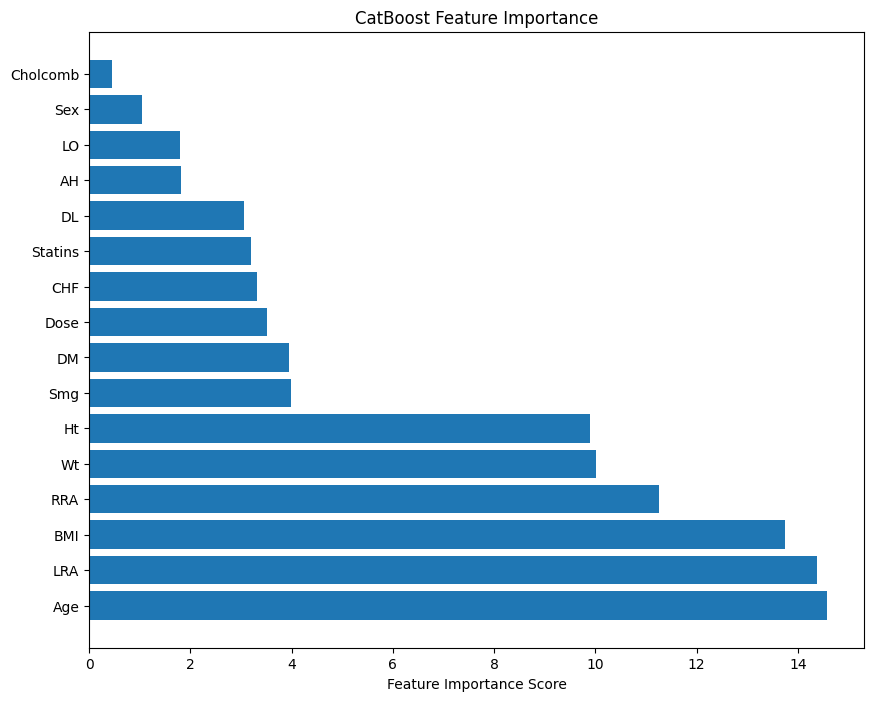

In [ ]:
importances = model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X_train.columns).sort_values()
sorted_idx = np.argsort(importances)[::-1]

# Plot the feature importance scores
plt.figure(figsize=(10, 8))
plt.barh(range(X_train.shape[1]), importances[sorted_idx])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel('Feature Importance Score')
plt.title('CatBoost Feature Importance')
plt.show()

In [ ]:
data[data['LO']==1].Price.mean()-data[data['LO']==0].Price.mean()

15616.246970276829

In [ ]:
data[data['LO']==0].Price.mean()

81205.17094017094

In [ ]:
predict = model.predict(data.drop('Price',axis=1))

In [ ]:
data=pd.read_excel('Predictions.xlsx')

In [ ]:
data

,Unnamed: 0,LRA,RRA,LO,DL,Smg,Sex,Ht,Wt,BMI,Age,DM,AH,CHF,Cholcomb,Statins,Dose,Price,cat_pred
0,0,2.3,2.4,0,0,1,1,168,70,24.801587,60,0,0,0,0.0,2,20,45500,39971.113748
1,1,2.5,2.8,0,0,0,1,166,92,33.386558,47,0,1,0,0.0,3,10,33400,69505.874331
2,2,2.5,3.0,0,0,1,1,176,82,26.472107,65,0,0,0,0.0,1,10,35400,45690.717445
3,3,2.3,2.4,0,0,0,1,170,99,34.256055,61,0,1,0,0.0,3,10,43400,63642.585195
4,4,2.3,2.1,0,0,0,2,168,102,36.139456,63,1,1,0,0.0,1,20,60000,62013.194269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,597,2.7,2.4,0,1,0,1,178,100,31.561672,69,0,0,0,0.0,1,20,52000,70774.484061
598,598,2.7,2.4,0,1,0,1,178,100,31.561672,71,0,0,0,0.0,1,20,72000,75670.981861
599,599,2.3,2.4,0,0,0,1,162,59,22.481329,78,0,1,0,0.0,1,10,147300,123423.522041
600,600,2.5,2.3,0,1,1,1,171,106,36.250470,61,0,1,0,0.0,1,20,154900,131999.773085


In [ ]:
data=data[['Sex','Wt','Ht','BMI','Smg','DM','AH','Age','Price','LO']]

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2)

In [ ]:
X_train = train.drop('Price',axis=1)
y_train = train.Price
X_test = test.drop('Price',axis=1)
y_test = test.Price

In [ ]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Функция, которая будет оптимизирована optuna
def objective(trial):
    # Гиперпараметры для тюнинга
    params = {
        'iterations': trial.suggest_int('iterations', 900, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'random_strength': trial.suggest_int('random_strength', 0, 100),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'od_type': trial.suggest_categorical('od_type', ['IncToDec', 'Iter']),
        # Другие параметры можно добавить здесь
    }

    # Инициализация CatBoostRegressor с текущими параметрами
    model = CatBoostRegressor(**params, loss_function='RMSE', verbose=False)

    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на валидационном наборе
    preds = model.predict(X_test)

    # Вычисление RMSE на валидационном наборе
    rmse = mean_squared_error(y_test, preds, squared=False)

    # Optuna стремится минимизировать возвращаемое значение
    return rmse

# Предполагаем, что X_train, y_train уже существуют и разделены на обучающий и валидационный наборы
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание объекта исследования и выполнение оптимизации
study = optuna.create_study(direction='minimize')  # Мы хотим минимизировать RMSE
study.optimize(objective, n_trials=100)  # Количество прогонов для поиска оптимальных параметров

# Лучшие параметры
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

# Обучение модели с лучшими параметрами
best_params = study.best_trial.params
best_catboost_model = CatBoostRegressor(**best_params, loss_function='RMSE', verbose=False)
best_catboost_model.fit(X_train, y_train)

# Предсказание и оценка модели с лучшими параметрами
y_pred_best = best_catboost_model.predict(X_test)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)
print('Best model RMSE:', rmse_best)

[I 2023-12-17 17:27:13,569] A new study created in memory with name: no-name-b75e5031-3b9f-41f6-b468-6f25f85ce56b
[I 2023-12-17 17:27:16,417] Trial 0 finished with value: 65342.956365194164 and parameters: {'iterations': 945, 'depth': 9, 'learning_rate': 0.05019278819642188, 'random_strength': 89, 'bagging_temperature': 0.7332320695827215, 'od_type': 'Iter'}. Best is trial 0 with value: 65342.956365194164.
[I 2023-12-17 17:27:19,878] Trial 1 finished with value: 68295.30667276893 and parameters: {'iterations': 966, 'depth': 9, 'learning_rate': 0.0903817624513222, 'random_strength': 51, 'bagging_temperature': 0.12326435048259432, 'od_type': 'Iter'}. Best is trial 0 with value: 65342.956365194164.
[I 2023-12-17 17:27:20,901] Trial 2 finished with value: 58917.53320183447 and parameters: {'iterations': 923, 'depth': 5, 'learning_rate': 0.01947828338029032, 'random_strength': 24, 'bagging_temperature': 0.33587446702971635, 'od_type': 'IncToDec'}. Best is trial 2 with value: 58917.533201834

Number of finished trials: 100
Best trial: {'iterations': 955, 'depth': 4, 'learning_rate': 0.010106424355252976, 'random_strength': 87, 'bagging_temperature': 0.13471438309207373, 'od_type': 'Iter'}
Best model RMSE: 51748.38439030685


In [ ]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
y_pred = dummy_regr.predict(X_test)
from sklearn.metrics import mean_squared_error
a = mean_squared_error(y_test, pd.Series(y_pred))
b = mean_absolute_percentage_error(y_test, pd.Series(y_pred))
c = r2_score(y_test, pd.Series(y_pred))
a,b,c

(2629724370.3649592, 0.6478369447589386, -0.0034837344970279904)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
params={'iterations': 955, 'depth': 4, 'learning_rate': 0.010106424355252976, 'random_strength': 87, 'bagging_temperature': 0.13471438309207373, 'od_type': 'Iter'}
model = CatBoostRegressor(**params, loss_function='RMSE', verbose=False)
# Обучение модели
model.fit(X_train, y_train)

# Выполнение предсказаний
y_pred_catboost = model.predict(X_test)

# Расчет RMSE (корень из среднеквадратичной ошибки)
a = mean_squared_error(y_test, y_pred_catboost)
b = mean_absolute_percentage_error(y_test, y_pred_catboost)
c = r2_score(y_test, y_pred_catboost)
a,b,c

(2677895287.0069532, 0.6360887236371894, -0.021865406687009203)

(2677895287.0069532, 0.6360887236371894, -0.021865406687009203)

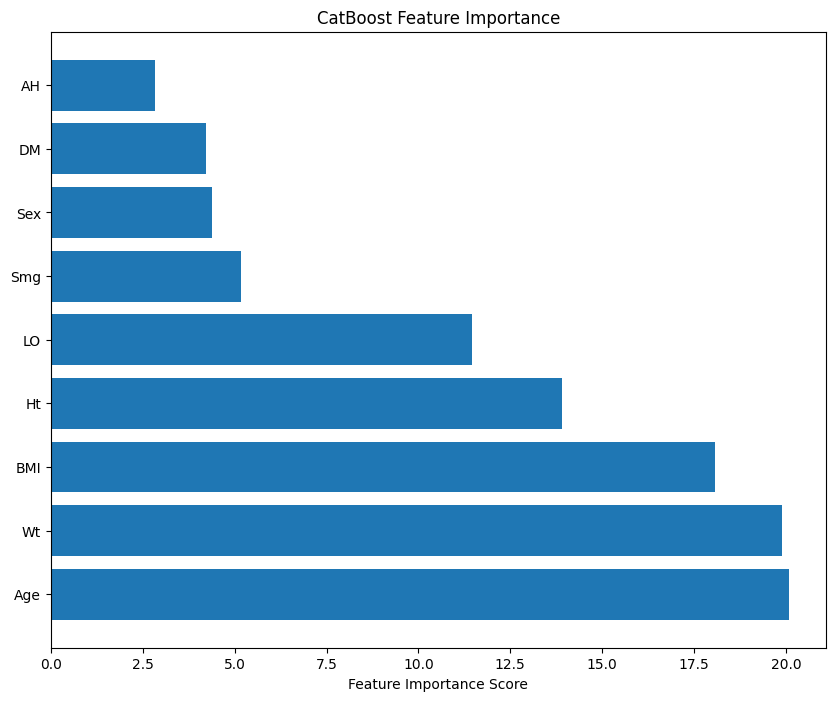

In [ ]:
importances = model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X_train.columns).sort_values()
sorted_idx = np.argsort(importances)[::-1]

# Plot the feature importance scores
plt.figure(figsize=(10, 8))
plt.barh(range(X_train.shape[1]), importances[sorted_idx])
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel('Feature Importance Score')
plt.title('CatBoost Feature Importance')
plt.show()

In [ ]:
importances

array([14.38385222, 11.25857691,  1.79067843,  3.06561397,  3.98411841,
        1.0414976 ,  9.89137775, 10.01492588, 13.74663864, 14.57969795,
        3.95312132,  1.80868146,  3.30814095,  0.44903181,  3.20533036,
        3.51871633])